NAME: HARINI S
REGISTER NUMBER: 20BCE1832
WEB MINING: LAB6 ASSIGNMENT

**Problem - 2:
Take any text corpora, apply necessary preprocessing and perform the k-means clustering on the corpora.**

In [1]:
pip install nltk scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:01:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.9/771.9 KB 3.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 3.7 MB/s eta 0:00:000:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


*THIS IS FOR DATA CORPORA*

In [2]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import random

# Sample text data
random.seed(42)
documents = [
    "Machine learning is an exciting field in artificial intelligence.",
    "Natural language processing is used to understand human language.",
    "Clustering is a form of unsupervised learning.",
    "Data preprocessing is essential in any data analysis.",
    "Neural networks are inspired by the human brain.",
    "Text mining involves extracting useful information from text data.",
    "Classification is a type of supervised learning.",
    "Dimensionality reduction techniques help in feature selection.",
    "Statistics is a fundamental concept in data science.",
    "Anomaly detection is used to find unusual patterns in data."
]

In [3]:
# Preprocessing and tokenization
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

preprocessed_documents = [preprocess_text(doc) for doc in documents]

[nltk_data] Downloading package punkt to /home/network1/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/network1/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_documents)

# Number of clusters
k = 3

In [5]:
# K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Print cluster assignments
print("Cluster Assignments:")
for i in range(k):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_documents = [documents[idx] for idx in cluster_indices]
    print(f"Cluster {i+1}: {cluster_documents}")

/home/network1/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Assignments:
Cluster 1: ['Data preprocessing is essential in any data analysis.', 'Text mining involves extracting useful information from text data.', 'Statistics is a fundamental concept in data science.', 'Anomaly detection is used to find unusual patterns in data.']
Cluster 2: ['Machine learning is an exciting field in artificial intelligence.', 'Clustering is a form of unsupervised learning.', 'Classification is a type of supervised learning.']
Cluster 3: ['Natural language processing is used to understand human language.', 'Neural networks are inspired by the human brain.', 'Dimensionality reduction techniques help in feature selection.']


**Problem – 1:
Implement k-means clustering for documents using reallocation method and show the output for given example (ppt).**

In [9]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups

# Load example text data (20 Newsgroups dataset)
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

In [10]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
X = vectorizer.fit_transform(documents)

# Number of clusters
k = 20

In [11]:
# K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Print cluster assignments
print("Cluster Assignments:")
for i in range(k):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    print(f"Cluster {i+1}: {len(cluster_indices)} documents")

/home/network1/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Assignments:
Cluster 1: 5345 documents
Cluster 2: 456 documents
Cluster 3: 632 documents
Cluster 4: 976 documents
Cluster 5: 333 documents
Cluster 6: 1918 documents
Cluster 7: 280 documents
Cluster 8: 1064 documents
Cluster 9: 264 documents
Cluster 10: 2837 documents
Cluster 11: 616 documents
Cluster 12: 72 documents
Cluster 13: 406 documents
Cluster 14: 388 documents
Cluster 15: 258 documents
Cluster 16: 190 documents
Cluster 17: 973 documents
Cluster 18: 320 documents
Cluster 19: 559 documents
Cluster 20: 959 documents


In [12]:
# Top terms in each cluster
print("\nTop terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print(f"Cluster {i+1}: ", end="")
    for ind in order_centroids[i, :10]:
        print(terms[ind], end=", ")
    print()


Top terms per cluster:
Cluster 1: edu, com, does, know, deleted, new, did, article, sure, just, 
Cluster 2: israel, jews, armenian, israeli, armenians, arab, turkish, jewish, arabs, people, 
Cluster 3: church, christian, religion, bible, christians, christianity, god, faith, people, believe, 
Cluster 4: thanks, advance, mail, know, does, hi, looking, info, help, information, 
Cluster 5: drive, hard, disk, drives, floppy, ide, controller, meg, hd, thanks, 
Cluster 6: card, use, file, window, program, pc, monitor, software, graphics, using, 
Cluster 7: god, believe, existence, bible, people, faith, does, belief, christians, know, 
Cluster 8: don, think, know, just, like, say, want, really, right, did, 
Cluster 9: jesus, god, christ, sin, bible, christian, people, mary, christians, life, 
Cluster 10: just, like, space, time, good, ve, use, know, years, new, 
Cluster 11: 00, sale, shipping, offer, condition, price, asking, new, 10, sell, 
Cluster 12: dsl, n3jxp, cadre, chastity, geb, inte

In this example, I'm using the **20 Newsgroups dataset** as an example text dataset.

**ELBOW METHOD AND SILHOUTTE METHOD**

In [13]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Sample text corpus
corpus = [
    "Machine learning is an exciting field in artificial intelligence.",
    "Natural language processing is used to understand human language.",
    "Clustering is a form of unsupervised learning.",
    "Data preprocessing is essential in any data analysis.",
    "Neural networks are inspired by the human brain.",
    "Text mining involves extracting useful information from text data.",
    "Classification is a type of supervised learning.",
    "Dimensionality reduction techniques help in feature selection.",
    "Statistics is a fundamental concept in data science.",
    "Anomaly detection is used to find unusual patterns in data."
]

# Preprocessing and TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

In [14]:
# Determine optimal number of clusters using the elbow method
inertia_values = []
silhouette_scores = []
num_clusters_range = range(2, 6)  # You can adjust this range

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

/home/network1/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/network1/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/network1/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/network1/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

Text(0, 0.5, 'Inertia')

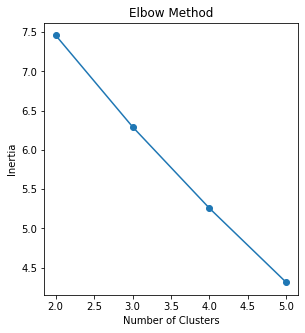

In [15]:
# Plotting Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Inertia')

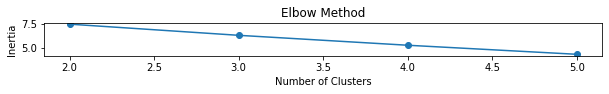

In [19]:
# Plotting Elbow Method (DIFFERENT PLOT)
plt.figure(figsize=(10, 5))
plt.subplot(7, 1, 2)
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

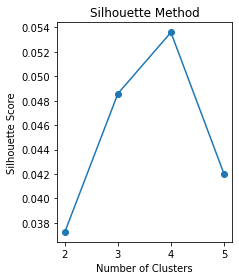

In [16]:
# Plotting Silhouette Method
plt.subplot(1, 2, 2)
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

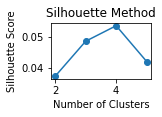

In [22]:
# Plotting Silhouette Method (DIFFERENT PLOT)
plt.subplot(3, 3, 2)
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()